# Desafío - Clasificación desde Machine Learning

## Desafío 1: Preparación del ambiente de trabajo
- Importe los módulos básicos para el análisis de datos
- Importe seaborn .
- Importe statsmodels
- Importe LogisticRegression , train_test_split , StandardScaler , classification_report y roc_curve de sklearn

In [1]:

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# importamos statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf

# importamos desde sklearn LogisticRegression
from sklearn.linear_model import LogisticRegression
#para generar la segmentación de muestras
from sklearn.model_selection import train_test_split
#facilitar la estandarizacion de los elementos de los atributos
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import roc_auc_score


In [2]:
df= pd.read_csv('default_credit.csv').drop('index',axis=1)

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [5]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## Desafío 2: Análisis exploratorio


- Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    - Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    - Un boxplot del balance total de las cuentas, segmentado por el status de default.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    - Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    - Un diagrama de dispersión entre balance e income , segmentado por el status de default.
- Comente brevemente sobre los principales patrones de comportamiento.
- tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por
status.


In [6]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


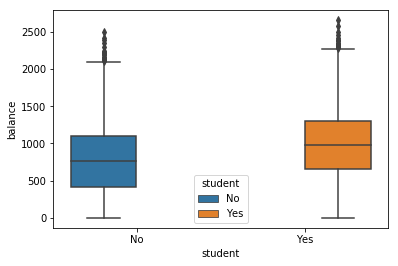

In [7]:
sns.boxplot(x=df['student'], y=df['balance'],hue=df['student'])

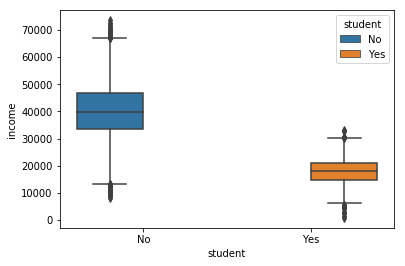

In [8]:
sns.boxplot(x=df['student'], y=df['income'],hue=df['student'])

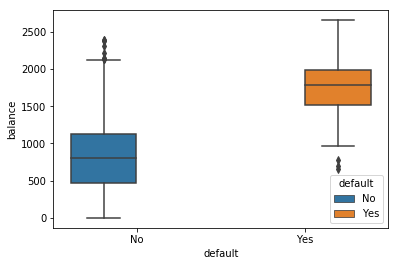

In [9]:
sns.boxplot(x=df['default'], y=df['balance'],hue=df['default'])

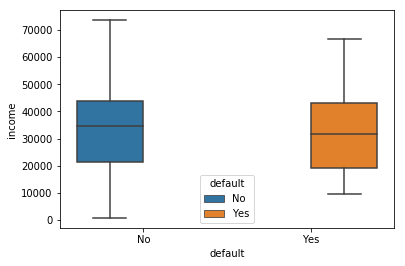

In [10]:
sns.boxplot(x=df['default'], y=df['income'],hue=df['default'])

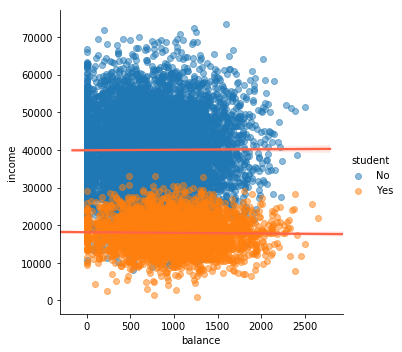

In [11]:
sns.lmplot('balance','income', df,
           hue='student',
           line_kws={'color':'tomato'},
           scatter_kws={ 'alpha': .5});

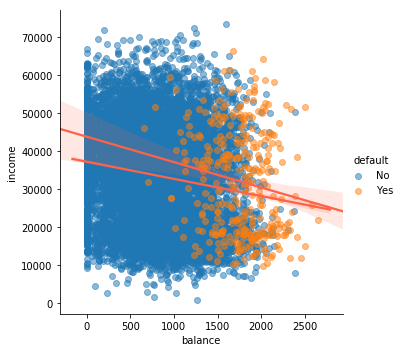

In [12]:
sns.lmplot('balance','income', df,
           hue='default',
           line_kws={'color':'tomato'},
           scatter_kws={ 'alpha': .5});

## Desafío 3: Modelación econométrica
- Recodifique las variables student y default para que adquieran atributos numéricos.
- Implemente el siguiente modelo econométrico:
- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.


In [13]:
df['student']= np.where(df['student']=='Yes',1,0)
df['default']= np.where(df['default']=='Yes',1,0)

In [14]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [15]:
m1_logit=smf.logit('default ~ balance + income + student', df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [16]:
m1_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1579.5448  
Date:               2019-06-13 23:13 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
student      -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

In [17]:
m2_logit=smf.logit('default ~ balance + student', df).fit()
m2_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1577.6816  
Date:               2019-06-13 23:13 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -10.7495    0.3692  -29.1149  0.0000  -11.4731  -10.0259
balance      0.0057    0.0002   24.7485  0.0000    0.0053    0.0062
student     -0.7149    0.1475   -4.8459  0.0000   -1.0040   -0.4257
==================================================================

"""

In [18]:
balance_mean = df['balance'].mean()
balance_mean

835.3748856125571

In [19]:
log_odds_1 = m2_logit.params['Intercept']+ (m2_logit.params['balance'] * balance_mean) + m2_logit.params['student']
log_odds_2 = m1_logit.params['Intercept']+ (m1_logit.params['balance'] * balance_mean)

In [20]:
def invlogit (x):
    return 1/ (1+np.exp(-x))

In [21]:
print('La probabilidad promedio de que el balance de la cuenta bancaria dependa mayoriatariamente por la condición de estudiante y los ingresos es: ', round(invlogit(log_odds_1),4))

print('La probabilidad promedio de que el balance de la cuenta bancaria no dependa mayoritariamente por la condición de estudiante y los ingresos es: ', round(invlogit(log_odds_2),4))

print('La diferencia entre ambas probabilidades es de: ', round(invlogit(log_odds_1),4)-round(invlogit(log_odds_2),4))

La probabilidad promedio de que el balance de la cuenta bancaria dependa mayoriatariamente por la condición de estudiante y los ingresos es:  0.0013
La probabilidad promedio de que el balance de la cuenta bancaria no dependa mayoritariamente por la condición de estudiante y los ingresos es:  0.0023
La diferencia entre ambas probabilidades es de:  -0.001


## Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
- Estandarize la matriz de atributos.
- Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
- Implemente el modelo sin alterar los hiperparámetros.
- Genere la predicción de las clases y de la probabilidad.
- Reporte las métricas de precision, recall y f1 para ambas clases.
- Grafique la curva Receiver Operator Characteristic.
- En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [22]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [23]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(df.loc[:,'student':'balance']), df['default'], test_size=.33, random_state= 82249)

C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
modelo_train = LogisticRegression().fit(X_train, y_train)
modelo_train.coef_

array([[-0.24303592,  2.45543945]])

In [25]:
yhat = modelo_train.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
P_yhat = modelo_train.predict_proba(X_test)
P_yhat

array([[9.88696317e-01, 1.13036827e-02],
       [9.12192920e-01, 8.78070802e-02],
       [9.95777081e-01, 4.22291860e-03],
       ...,
       [9.99929082e-01, 7.09182681e-05],
       [9.98298790e-01, 1.70121027e-03],
       [9.86224861e-01, 1.37751391e-02]])

In [27]:
P_log_yhat = modelo_train.predict_log_proba(X_test)
P_log_yhat

array([[-1.13680549e-02, -4.48262670e+00],
       [-9.19037764e-02, -2.43261314e+00],
       [-4.23186030e-03, -5.46722878e+00],
       ...,
       [-7.09207829e-05, -9.55398250e+00],
       [-1.70265897e-03, -6.37641536e+00],
       [-1.38708968e-02, -4.28488982e+00]])

### ,etricas de desempeño

In [28]:
matriz_confusion = confusion_matrix(y_test, yhat)
matriz_confusion

array([[3185,    8],
       [  73,   34]], dtype=int64)

In [29]:
exactitud = accuracy_score(y_test, yhat)
exactitud

0.9754545454545455

In [30]:
precision = precision_score(y_test, yhat)
precision

0.8095238095238095

In [31]:
recall = recall_score(y_test, yhat)
recall

0.3177570093457944

In [32]:
f1 = f1_score(y_test, yhat)
f1

0.4563758389261745

In [33]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3193
           1       0.81      0.32      0.46       107

   micro avg       0.98      0.98      0.98      3300
   macro avg       0.89      0.66      0.72      3300
weighted avg       0.97      0.98      0.97      3300



In [34]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat_pr = modelo_train.predict_proba(X_test)[:, 1]
# generamos los objetos necesarios para desarrollar la curva roc
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)

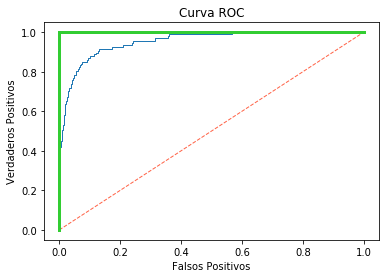

In [35]:
# curva roc
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)#curva azul
plt.plot([0, 1], ls="--", lw=1, color = 'tomato')# bisectriz
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [36]:
roc_auc_score(y_test, yhat_pr)

0.9543510775616052